<a href="https://colab.research.google.com/github/KMKomer/case-study-optimaization-of-ER-waiting-time/blob/main/clean_ER_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# case study: opimizing emergancy room waiting times

the health care sector is the back bone of modren human life. hospitals are the place humans fight death evrey day so the call was clear if we want a better future for the human being we should start were we face our biggest fear and stand to change our fait.



### we will start by calling the needed libararies

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### then uploading our data

In [11]:
### loading data
df = pd.read_csv("ER_wait2.csv")

### Taking a genral insight of the data

#### details:
we are having a 5000 unique non null values with 19 features 9 of them are objects, one date-time and 8 numirical values. The data has an AVERAGE waiting time of 81.91 and a standard deviation of 68.08 , we also have a max waiting time 441 mins.

In [12]:
### checking data
print(df.info())
print(df.head())
df.describe(include="all")
df.describe().T
df.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   visit_id                      5000 non-null   object
 1   patient_id                    5000 non-null   object
 2   hospital_id                   5000 non-null   object
 3   hospital_name                 5000 non-null   object
 4   region                        5000 non-null   object
 5   visit_date                    5000 non-null   object
 6   day_of_week                   5000 non-null   object
 7   season                        5000 non-null   object
 8   time_of_day                   5000 non-null   object
 9   urgency_level                 5000 non-null   object
 10  nurse-to-patient_ratio        5000 non-null   int64 
 11  specialist_availability       5000 non-null   int64 
 12  facility_size                 5000 non-null   int64 
 13  time_of_registrati

,0
visit_id,object
patient_id,object
hospital_id,object
hospital_name,object
region,object
visit_date,object
day_of_week,object
season,object
time_of_day,object
urgency_level,object


### For validating datatypes
we also need to saparat date from time to use each for relation analysis

In [13]:
### validate and correct data types
df['visit_date'] = pd.to_datetime(df['visit_date'])
df['total_wait_time'] = pd.to_numeric(df['total_wait_time'])
df['time'] = df['visit_date'].dt.time
df['month'] = df['visit_date'].dt.month_name()
df['date'] = df['visit_date'].dt.date
print(df['time'], df['month'], df['date'])

0       20:20:00
1       02:07:00
2       04:02:00
3       00:31:00
4       16:52:00
          ...   
4995    04:29:00
4996    22:44:00
4997    21:06:00
4998    03:11:00
4999    23:05:00
Name: time, Length: 5000, dtype: object 0        February
1        November
2       September
3        February
4           March
          ...    
4995     December
4996         June
4997     February
4998       August
4999       August
Name: month, Length: 5000, dtype: object 0       2024-02-10
1       2024-11-28
2       2024-09-30
3       2024-02-27
4       2024-03-06
           ...    
4995    2024-12-12
4996    2024-06-30
4997    2024-02-13
4998    2024-08-28
4999    2024-08-25
Name: date, Length: 5000, dtype: object


### getting out of out layers
to have as clean as possible good data

In [14]:
# unrealistic wait time
df['total_wait_time'] = df['total_wait_time'].clip(upper=1440)

In [15]:
# invalide traige time
df[~df['time_to_triage'].between(0,130)]

,visit_id,patient_id,hospital_id,hospital_name,region,visit_date,day_of_week,season,time_of_day,urgency_level,...,facility_size,time_of_registration,time_to_triage,time_of_medical_professional,total_wait_time,patient_outcome,patient_satisfaction,time,month,date
215,HOSP-3-20241216-0041,PAT-00216,HOSP-3,Northside Community Hospital,Rural,2024-12-16 20:10:00,Monday,Winter,Evening,Low,...,13,35,142,152,329,Discharged,1,20:10:00,December,2024-12-16
511,HOSP-5-20240212-0082,PAT-00512,HOSP-5,Summit Health Center,Urban,2024-02-12 01:17:00,Monday,Winter,Evening,Low,...,52,66,145,231,442,Discharged,1,01:17:00,February,2024-02-12
718,HOSP-2-20240119-0135,PAT-00719,HOSP-2,Riverside Medical Center,Urban,2024-01-19 06:52:00,Friday,Winter,Evening,Low,...,102,38,135,124,297,Discharged,1,06:52:00,January,2024-01-19
1772,HOSP-5-20240812-0313,PAT-01773,HOSP-5,Summit Health Center,Urban,2024-08-12 00:46:00,Monday,Summer,Evening,Low,...,168,53,136,192,381,Discharged,1,00:46:00,August,2024-08-12
1889,HOSP-3-20240115-0382,PAT-01890,HOSP-3,Northside Community Hospital,Rural,2024-01-15 04:38:00,Monday,Winter,Evening,Low,...,14,51,163,136,350,Discharged,1,04:38:00,January,2024-01-15
1995,HOSP-4-20241220-0414,PAT-01996,HOSP-4,St. Mary’s Regional Health,Rural,2024-12-20 21:27:00,Friday,Winter,Evening,Low,...,30,29,146,179,354,Left Without Being Seen,1,21:27:00,December,2024-12-20
2013,HOSP-5-20241202-0363,PAT-02014,HOSP-5,Summit Health Center,Urban,2024-12-02 01:06:00,Monday,Winter,Evening,Low,...,108,60,149,220,429,Discharged,1,01:06:00,December,2024-12-02
2194,HOSP-3-20240126-0437,PAT-02195,HOSP-3,Northside Community Hospital,Rural,2024-01-26 08:03:00,Friday,Winter,Evening,Low,...,29,29,139,187,355,Discharged,1,08:03:00,January,2024-01-26
3260,HOSP-1-20241202-0679,PAT-03261,HOSP-1,Springfield General Hospital,Urban,2024-12-02 11:09:00,Monday,Winter,Evening,Low,...,199,35,132,171,338,Discharged,1,11:09:00,December,2024-12-02
3381,HOSP-2-20241216-0679,PAT-03382,HOSP-2,Riverside Medical Center,Urban,2024-12-16 09:15:00,Monday,Winter,Afternoon,Low,...,104,45,133,198,376,Left Without Being Seen,1,09:15:00,December,2024-12-16


In [16]:
### quality flages
df['data_flag'] = 'clean'
df.loc[df['total_wait_time'] > 720, 'data_flag'] = 'outlaier_wait'

### Making a clean falg over cleaned data

In [17]:
### data quality report
summary = {
    "total_rows": len(df),
    "missing_fixed": df.isnull().sum(),
    "outliers_flagged":(df['data_flag'] != 'clean').sum()
}
print(summary)

{'total_rows': 5000, 'missing_fixed': visit_id                        0
patient_id                      0
hospital_id                     0
hospital_name                   0
region                          0
visit_date                      0
day_of_week                     0
season                          0
time_of_day                     0
urgency_level                   0
nurse-to-patient_ratio          0
specialist_availability         0
facility_size                   0
time_of_registration            0
time_to_triage                  0
time_of_medical_professional    0
total_wait_time                 0
patient_outcome                 0
patient_satisfaction            0
time                            0
month                           0
date                            0
data_flag                       0
dtype: int64, 'outliers_flagged': np.int64(0)}


### Saving the data as a csv

In [18]:
### saving cleaned data
df.to_csv("clean_ER.csv", index=False)

### Relationship analysis
#### visualising the relationships between multiple features affecting the total waiting time and total patien satisfaction

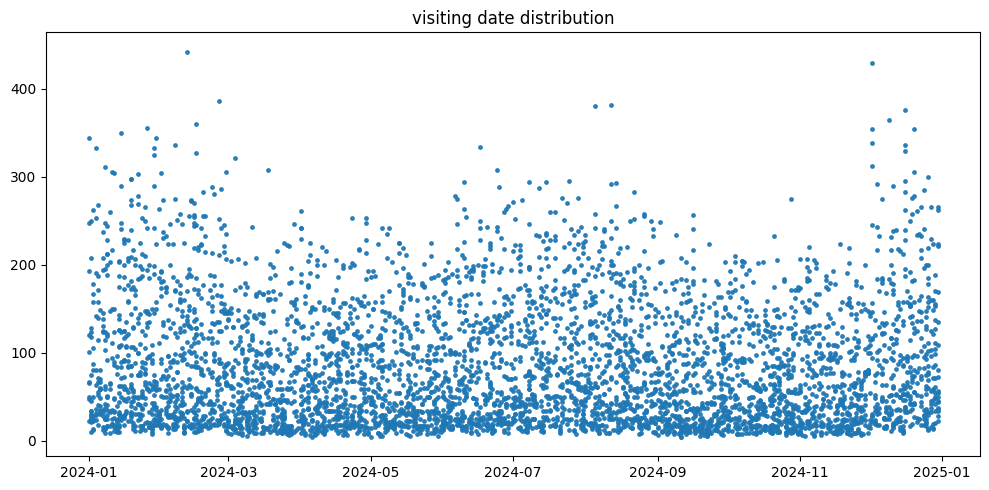

In [31]:
### visualizing

# line chart on visit date
plt.figure(figsize=(10, 5))
plt.scatter(df['date'], df['total_wait_time'], alpha = 0.9, s = 6)
plt.title('visiting date distribution')
plt.tight_layout()
plt.show()

/tmp/ipython-input-3498477327.py:14: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()


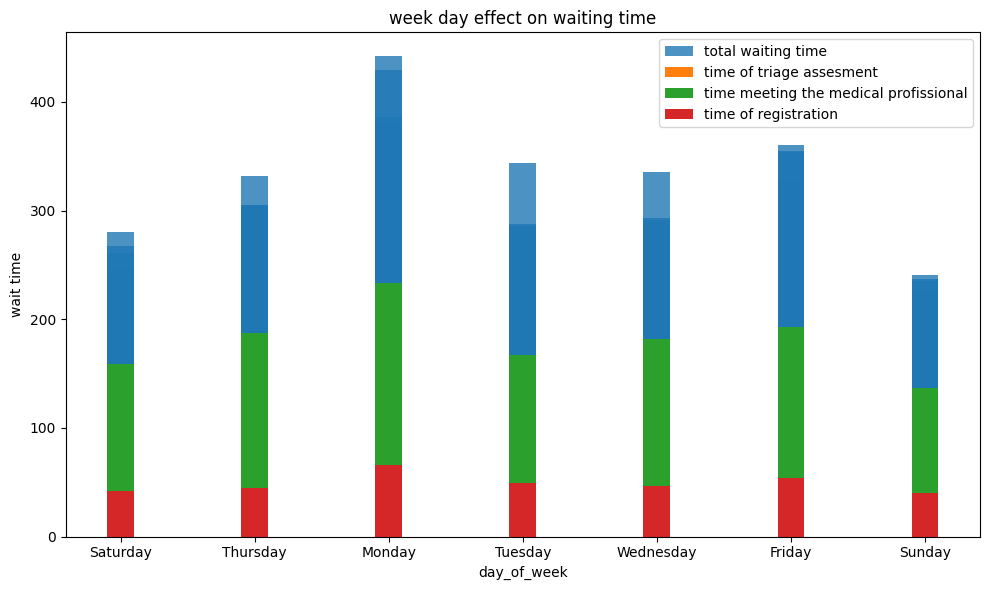

In [45]:
# bar chart

width = 0.20
plt.figure(figsize=(10,6))
plt.bar(df['day_of_week'], df['total_wait_time'], width, label = 'total waiting time', alpha = 0.8)
plt.bar(df['day_of_week'], df['time_to_triage'], width, label = 'time of triage assesment')
plt.bar(df['day_of_week'], df['time_of_medical_professional'], width, label = 'time meeting the medical profissional')
plt.bar(df['day_of_week'], df['time_of_registration'], width, label = 'time of registration')

plt.xlabel('day_of_week')
plt.ylabel('wait time')
plt.title('week day effect on waiting time')
plt.legend()
plt.tight_layout()
plt.show()

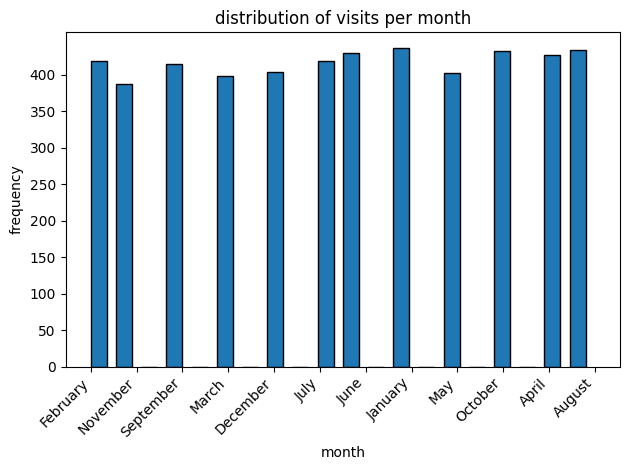

In [42]:
# histogram on months
new_ticks = np.arange(0,450,50)

plt.hist(df['month'], bins = 20, edgecolor= 'black', width = 0.35)
plt.title('distribution of visits per month')
plt.xlabel('month')
plt.ylabel('frequency')
plt.xticks(rotation = 45, ha ='right')
plt.yticks(new_ticks)
plt.tight_layout()
plt.show()

In [46]:
## relationship between variables

NameError: name 'axis' is not defined